# KNN

# Zoo dataset

In [15]:
# Importing libraries
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
from sklearn.model_selection import GridSearchCV,train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler

In [16]:
# Load Zoo dataset
zoo = pd.read_csv("/Users/Admin/Documents/data science assignment/KNN/Zoo.csv")

In [17]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# Data Processing

In [18]:
zoo.shape

(101, 18)

In [19]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [20]:
zoo[zoo.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


#### There is no duplicate values in our data 

In [21]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [22]:
zoo = pd.get_dummies(zoo,columns=['legs'])

In [23]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,0,1,1,0,0,1,0,0,0
1,antelope,1,0,0,1,0,0,0,1,1,...,1,0,1,1,0,0,1,0,0,0
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,0,4,1,0,0,0,0,0
3,bear,1,0,0,1,0,0,1,1,1,...,0,0,1,1,0,0,1,0,0,0
4,boar,1,0,0,1,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0


In [24]:
zoo['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

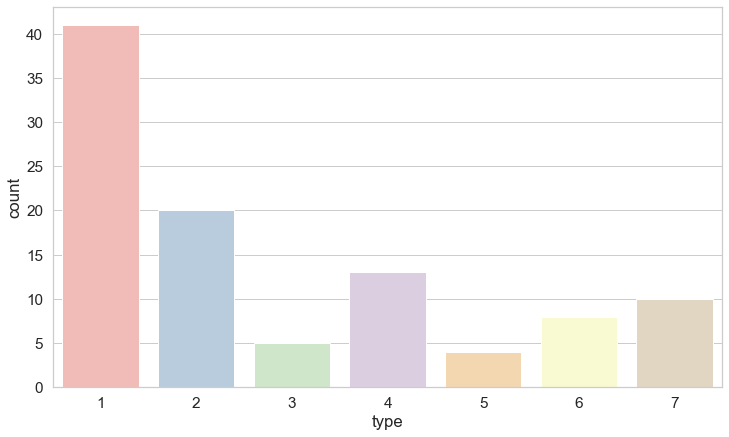

In [25]:
sns.set(style = 'whitegrid',font_scale =1.4)
plt.subplots(figsize = (12,7))
sns.countplot(x='type',data = zoo, palette = 'Pastel1')

# Splitting Train and Test

In [27]:
y = zoo['type']
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [28]:
X = zoo.drop('animal name',axis=1)

In [29]:
X = X.drop('type',axis=1)

In [30]:
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,fins,tail,domestic,catsize,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,0,1,0,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,1,0,0,1,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,0,1,0,1,0,0,1,0,0,0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 30, stratify = y)

In [32]:
X_train.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,fins,tail,domestic,catsize,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
20,0,1,1,0,1,0,0,0,1,1,...,0,1,1,0,0,1,0,0,0,0
64,1,0,0,1,0,0,1,1,1,1,...,0,1,0,1,0,0,1,0,0,0
90,0,0,1,0,0,0,0,0,1,1,...,0,1,0,1,0,0,1,0,0,0
59,0,1,1,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,0
30,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [33]:
X_test.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,fins,tail,domestic,catsize,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
46,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
79,0,1,1,0,1,1,1,0,1,1,...,0,1,0,0,0,1,0,0,0,0
23,0,1,1,0,1,0,0,0,1,1,...,0,1,0,1,0,1,0,0,0,0
60,0,0,1,0,0,1,1,1,1,0,...,1,1,0,1,1,0,0,0,0,0
97,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [34]:
y_train.head()

20    2
64    1
90    3
59    2
30    6
Name: type, dtype: int64

In [35]:
y_test.head()

46    7
79    2
23    2
60    4
97    6
Name: type, dtype: int64

# Grid search for Algorithm Tuning

In [36]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [38]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=10)
grid.fit(X_train,y_train)
print(grid.best_params_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


{'n_neighbors': 1}


# Visualizing the CV results

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Admin\anaconda3\lib\site-packag

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


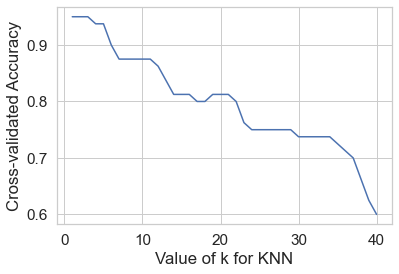

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
k_range = range(1,41)
k_scores =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    k_scores.append(scores.mean())
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-validated Accuracy')
plt.show()

# Using KNN Classifier for prediction

In [41]:
model = KNeighborsClassifier(n_neighbors = 1).fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9523809523809523


In [42]:
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         3
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.79      0.86      0.81        21
weighted avg       0.93      0.95      0.94        21



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Accuracy of the prediction model is 95%